In [2]:
from typing import Union, List
import numpy as np

In [3]:
def walk(atoms: int,
         timesteps: np.ndarray,
         jump_size: int = 1,
         seed: np.random.mtrand.RandomState = np.random.RandomState()) -> np.ndarray:
    """
    Perform a random walk.

    :param atoms: number of atoms
    :param timesteps: the timestep values
    :param jump_size: size of jump
    :param seed: random seed source
    :return: cumulative sum of steps for walk
    """
    possible_moves = np.zeros((6, 3))
    j = 0
    for i in range(0, 6, 2):
        possible_moves[i, j] = jump_size
        possible_moves[i + 1, j] = -jump_size
        j += 1
    choices = seed.choice(len(range(len(possible_moves))), size=(atoms, len(timesteps)))
    steps = np.zeros((atoms, len(timesteps), 3))
    for i in range(steps.shape[0]):
        for j in range(steps.shape[1]):
            steps[i, j] = possible_moves[choices[i, j]]
    return steps

In [4]:
n_atoms = 124
dt = np.arange(1, 129, 1)

In [5]:
from tqdm import tqdm
import matplotlib.pyplot as plt

In [6]:

# Using magnitude of displacement

n_runs = 1


int_scat = np.zeros((n_runs,len(dt)))

for j in tqdm(range(n_runs)):
    steps = walk(n_atoms, dt, seed=np.random.RandomState(j))
    cum_steps = np.cumsum(steps, axis=1)
    disp_3d = []
    n_i = np.array([])
    for i, n in enumerate(dt):
        disp = np.concatenate([cum_steps[:, np.newaxis, i],
                                np.subtract(cum_steps[:, i + 1:], cum_steps[:, :-(i + 1)])],
                                axis=1)
        disp_3d.append(disp)
        n_i = np.append(n_i, dt[-1] / n * n_atoms)
        int_scat[j,i] = np.mean(np.mean(np.exp(1j * np.linalg.norm(disp, axis = 2)), axis = 1))


# Normalising displacement across all 3 axis sqrt(x^2 + y^2 + z^2)

#Take the exponential of the imaginary unit times the magnitude of the displacement

#Take the mean of that over the number of the number of observations 

#Take the mean of that over the number of atoms


  0%|          | 0/1 [00:00<?, ?it/s]/var/folders/8y/ppth74md47d_wyx004p8vy6h0000gp/T/ipykernel_57129/1764602205.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
  int_scat[j,i] = np.mean(np.mean(np.exp(1j * np.linalg.norm(disp, axis = 2)), axis = 1))
100%|██████████| 1/1 [00:00<00:00, 27.71it/s]


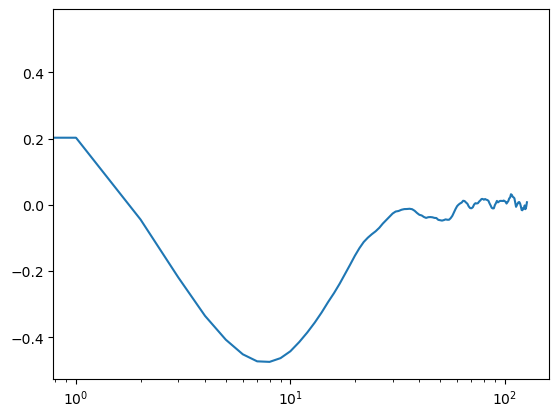

In [7]:
# Normalised displacement


plt.plot(int_scat.T)
plt.xscale('log')


In [8]:

# Applying to each displacement axis separately

n_runs = 1


int_scat = np.zeros((n_runs,len(dt),3))

for j in tqdm(range(n_runs)):
    steps = walk(n_atoms, dt, seed=np.random.RandomState(j))
    cum_steps = np.cumsum(steps, axis=1)
    disp_3d = []
    n_i = np.array([])
    for i, n in enumerate(dt):
        disp = np.concatenate([cum_steps[:, np.newaxis, i],
                                np.subtract(cum_steps[:, i + 1:], cum_steps[:, :-(i + 1)])],
                                axis=1)
        disp_3d.append(disp)
        n_i = np.append(n_i, dt[-1] / n * n_atoms)
        int_scat[j,i] = np.mean(np.mean(np.exp(1j * disp), axis=1),axis=0)


# Normalising displacement across all 3 axis sqrt(x^2 + y^2 + z^2)

#Take the exponential of the imaginary unit times the magnitude of the displacement

#Take the mean of that over the number of the number of observations 

#Take the mean of that over the number of atoms

  0%|          | 0/1 [00:00<?, ?it/s]/var/folders/8y/ppth74md47d_wyx004p8vy6h0000gp/T/ipykernel_57129/1809501904.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
  int_scat[j,i] = np.mean(np.mean(np.exp(1j * disp), axis=1),axis=0)
100%|██████████| 1/1 [00:00<00:00, 17.47it/s]


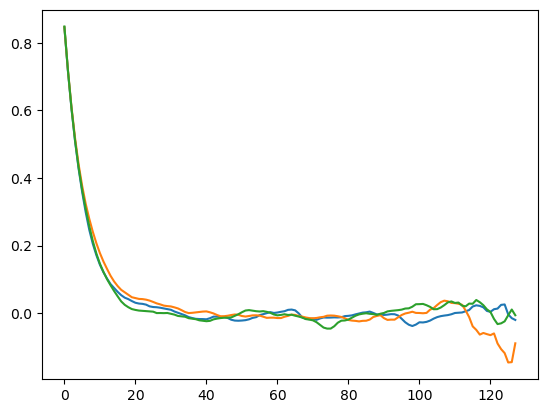

In [9]:
import matplotlib.pyplot as plt 

# Across 3 axis separartely

plt.plot((int_scat.T[0]))
plt.plot((int_scat.T[1]))
plt.plot((int_scat.T[2]))
#plt.xscale('log')

# Applying across a grid off q_points

In [10]:
n_atoms = 124
dt = np.arange(1, 129, 1)

In [11]:
def periodic_walk(atoms: int,
         timesteps: np.ndarray,
         jump_size: int = 1,
         seed: np.random.mtrand.RandomState = np.random.RandomState()) -> np.ndarray:
    """
    Perform a random walk.

    :param atoms: number of atoms
    :param timesteps: the timestep values
    :param jump_size: size of jump
    :param seed: random seed source
    :return: cumulative sum of steps for walk
    """
    possible_moves = np.zeros((6, 3))
    j = 0
    for i in range(0, 6, 2):
        possible_moves[i, j] = jump_size
        possible_moves[i + 1, j] = -jump_size
        j += 1
    choices = seed.choice(len(range(len(possible_moves))), size=(atoms, len(timesteps)))
    steps = np.zeros((atoms, len(timesteps), 3))
    for i in range(steps.shape[0]):
        for j in range(steps.shape[1]):
            steps[i, j] = possible_moves[choices[i, j]]
    return steps

In [12]:
from dynasor.qpoints import get_spherical_qpoints

cell  = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])

q_points = get_spherical_qpoints(cell, q_max=2, max_points=100)

q_points.shape

(1, 3)

In [13]:
from dynasor.qpoints import get_spherical_qpoints

cell  = np.array([[10, 0, 0], [0, 10, 0], [0, 0, 10]])

q_points = get_spherical_qpoints(cell, q_max = 2)

q_points.shape

(35, 3)

In [14]:
np.dot(disp, q_points.T).shape

(124, 1, 35)

In [15]:
# Non einsum implementation (slower)

n_runs = 10
box_size = [10,10,10]

int_scat_1 = np.zeros((n_runs,len(dt),len(q_points)))

for j in tqdm(range(n_runs)):
    steps = walk(n_atoms, dt, seed=np.random.RandomState(j))
    cum_steps = np.cumsum(steps, axis=1)
    disp_3d = []
    n_i = np.array([])
    for k in range(0,len(q_points)):
        for i, n in enumerate(dt):
            disp = np.concatenate([cum_steps[:, np.newaxis, i],
                                    np.subtract(cum_steps[:, i + 1:], cum_steps[:, :-(i + 1)])],
                                    axis=1) % box_size # Modulus operator for periodic boundary conditions
            disp_3d.append(disp)
            n_i = np.append(n_i, dt[-1] / n * n_atoms)
            int_scat_1[j,i,k] = np.mean(np.mean(np.exp(1j * np.dot(disp, q_points[k])), axis = 1))

  0%|          | 0/10 [00:00<?, ?it/s]/var/folders/8y/ppth74md47d_wyx004p8vy6h0000gp/T/ipykernel_57129/3568609868.py:20: ComplexWarning: Casting complex values to real discards the imaginary part
  int_scat_1[j,i,k] = np.mean(np.mean(np.exp(1j * np.dot(disp, q_points[k])), axis = 1))
100%|██████████| 10/10 [00:18<00:00,  1.84s/it]


In [68]:
dt

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128])

In [186]:
# einsum dot product improvement

# estimated variance

n_atoms = 124
dt = np.arange(1, 129, 1)
n_runs = 1
box_size = [10,10,10]

int_scat = np.zeros((n_runs,len(dt),len(q_points)))

var_est = np.zeros((len(q_points),len(dt)))

N = np.zeros(len(dt))

for j in tqdm(range(n_runs)):
    steps = walk(n_atoms, dt, seed=np.random.RandomState(j))
    cum_steps = np.cumsum(steps, axis=1)
    disp_3d = []
    n_i = np.array([])
    for i, n in enumerate(dt):
        disp = np.concatenate([cum_steps[:, np.newaxis, i],
                                np.subtract(cum_steps[:, i + 1:], cum_steps[:, :-(i + 1)])],
                                axis=1) % box_size # Modulus operator for periodic boundary conditions
        disp_3d.append(disp)
        n_i = np.append(n_i, dt[-1] / n * n_atoms)

        step0 = 1j*np.einsum('ijk,lk->ijl', disp, q_points)

        var0 = np.var(step0.reshape(-1,len(q_points)),axis = 0)

        step1 = np.exp(step0)
        
        var_est[:,i] = np.var(step1.reshape(-1,len(q_points)),axis =0) #/ (dt[-1] / n*n_atoms)

        N[i] = n * n_atoms

        int_scat[j,i,:] = np.mean(np.mean(step1, axis = 1), axis = 0)

  0%|          | 0/1 [00:00<?, ?it/s]/var/folders/8y/ppth74md47d_wyx004p8vy6h0000gp/T/ipykernel_57129/4009319872.py:38: ComplexWarning: Casting complex values to real discards the imaginary part
  int_scat[j,i,:] = np.mean(np.mean(step1, axis = 1), axis = 0)
100%|██████████| 1/1 [00:00<00:00,  1.05it/s]


In [194]:
# einsum dot product improvement

# numerical variance

n_atoms = 124
dt = np.arange(1, 129, 1)
n_runs = 100
box_size = [10,10,10]

int_scat_num = np.zeros((n_runs,len(dt),len(q_points)))

var_num = np.zeros((len(q_points),len(dt)))

for j in tqdm(range(n_runs)):
    steps = walk(n_atoms, dt, seed=np.random.RandomState(j))
    cum_steps = np.cumsum(steps, axis=1)
    disp_3d = []
    n_i = np.array([])
    for i, n in enumerate(dt):
        disp = np.concatenate([cum_steps[:, np.newaxis, i],
                                np.subtract(cum_steps[:, i + 1:], cum_steps[:, :-(i + 1)])],
                                axis=1) % box_size # Modulus operator for periodic boundary conditions
        disp_3d.append(disp)
        n_i = np.append(n_i, dt[-1] / n * n_atoms)

        step1 = np.exp(1j*np.einsum('ijk,lk->ijl', disp, q_points))
        
        #var_num[:,i] = np.var(step1.reshape(-1,len(q_points)),axis = 0)

        int_scat_num[j,i,:] = np.mean(np.mean(step1, axis = 1), axis = 0)

  0%|          | 0/100 [00:00<?, ?it/s]/var/folders/8y/ppth74md47d_wyx004p8vy6h0000gp/T/ipykernel_57129/1287616603.py:30: ComplexWarning: Casting complex values to real discards the imaginary part
  int_scat_num[j,i,:] = np.mean(np.mean(step1, axis = 1), axis = 0)
100%|██████████| 100/100 [01:12<00:00,  1.38it/s]


In [205]:
np.var(int_scat_num,axis = 0).shape

(128, 35)

In [151]:
len(disp_3d)

128

In [171]:
mean_disp = np.zeros((128,3))

for i in range(0,len(disp_3d)):
    mean_disp[i]= np.array(disp_3d[i]).reshape(-1,3).mean(axis = 0)

In [172]:
mean_disp.shape

(128, 3)

In [173]:
mean_disp

array([[1.68497984, 1.69398942, 1.65177671],
       [2.51454153, 2.52133604, 2.49333249],
       [2.99391961, 2.95954941, 2.95922939],
       [3.28967742, 3.24270968, 3.2563871 ],
       [3.47346514, 3.44667014, 3.42741935],
       [3.61834514, 3.55940205, 3.58084186],
       [3.71622158, 3.64998678, 3.70505024],
       [3.80931752, 3.75979739, 3.78825646],
       [3.89502688, 3.84596774, 3.85658602],
       [3.97953375, 3.92694497, 3.93087558],
       [4.05194095, 4.00013669, 4.0020503 ],
       [4.11373036, 4.03915081, 4.07085746],
       [4.16928532, 4.08252225, 4.12096774],
       [4.20946704, 4.14046283, 4.18190743],
       [4.26810979, 4.19531692, 4.24243067],
       [4.28397088, 4.21995432, 4.25628033],
       [4.29097062, 4.22717454, 4.27923387],
       [4.32214473, 4.24418774, 4.32367044],
       [4.33731672, 4.25131965, 4.3452346 ],
       [4.34070731, 4.2423794 , 4.34307487],
       [4.37320789, 4.26471027, 4.35655615],
       [4.35431112, 4.25339162, 4.36968646],
       [4.

In [174]:
var_num_mean =np.exp(1j*np.einsum('jk,lk->jl', mean_disp, q_points))

var_num_mean.shape

(128, 35)

In [183]:
mean_num = np.mean(int_scat_num,axis = 0)

mean_num.shape

(128, 35)

/opt/anaconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/anaconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


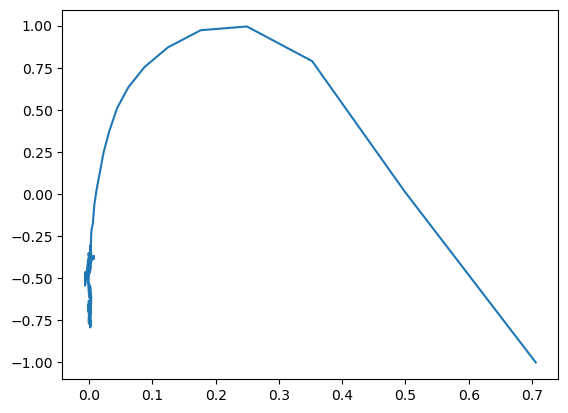

In [202]:
plt.plot(mean_num[:,15], var_num_mean[:,15])

In [196]:
var_num[:,10]

array([0.        , 0.75617765, 0.7697365 , 0.7576781 , 0.9418992 ,
       0.95261541, 0.94779468, 0.99130438, 0.99770656, 0.99696989,
       0.99644689, 0.99956861, 0.99971413, 0.99860254, 0.99952082,
       0.99914474, 0.99961278, 0.99972806, 0.99989694, 0.99994942,
       0.9997682 , 0.99983625, 0.99998483, 0.99982741, 0.99999124,
       0.9995812 , 0.99981864, 0.99999772, 0.99997248, 0.99999964,
       0.99972604, 0.99957292, 0.99999383, 0.99977208, 0.99995799])

In [197]:
var_est[:,10]

array([0.        , 0.00053484, 0.00054585, 0.00052065, 0.00066528,
       0.00065902, 0.00066245, 0.00068748, 0.00069061, 0.00068984,
       0.0006915 , 0.00069249, 0.00069244, 0.00069277, 0.00069288,
       0.00069291, 0.00069303, 0.00069302, 0.00069286, 0.00069301,
       0.00069297, 0.00069296, 0.00069304, 0.000693  , 0.000693  ,
       0.00069287, 0.00069288, 0.00069296, 0.00069286, 0.000693  ,
       0.00069301, 0.00069304, 0.00069298, 0.00069281, 0.00069279])

In [191]:
var_est.shape

(35, 128)

In [207]:
N

array([  124.,   248.,   372.,   496.,   620.,   744.,   868.,   992.,
        1116.,  1240.,  1364.,  1488.,  1612.,  1736.,  1860.,  1984.,
        2108.,  2232.,  2356.,  2480.,  2604.,  2728.,  2852.,  2976.,
        3100.,  3224.,  3348.,  3472.,  3596.,  3720.,  3844.,  3968.,
        4092.,  4216.,  4340.,  4464.,  4588.,  4712.,  4836.,  4960.,
        5084.,  5208.,  5332.,  5456.,  5580.,  5704.,  5828.,  5952.,
        6076.,  6200.,  6324.,  6448.,  6572.,  6696.,  6820.,  6944.,
        7068.,  7192.,  7316.,  7440.,  7564.,  7688.,  7812.,  7936.,
        8060.,  8184.,  8308.,  8432.,  8556.,  8680.,  8804.,  8928.,
        9052.,  9176.,  9300.,  9424.,  9548.,  9672.,  9796.,  9920.,
       10044., 10168., 10292., 10416., 10540., 10664., 10788., 10912.,
       11036., 11160., 11284., 11408., 11532., 11656., 11780., 11904.,
       12028., 12152., 12276., 12400., 12524., 12648., 12772., 12896.,
       13020., 13144., 13268., 13392., 13516., 13640., 13764., 13888.,
      

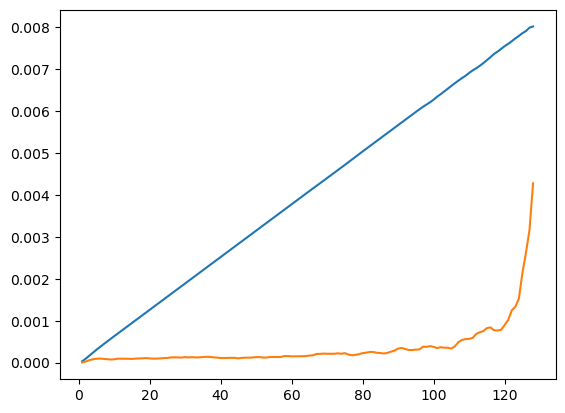

In [223]:
fig, ax = plt.subplots()

ax.plot(dt,var_est.T[:,q])
ax.plot(dt,np.var(int_scat_num,axis = 0)[:,q])

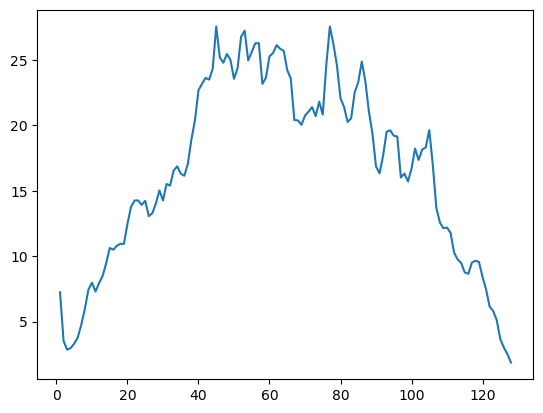

In [224]:
plt.plot(dt, var_est.T[:,q] / np.var(int_scat_num,axis = 0)[:,q])

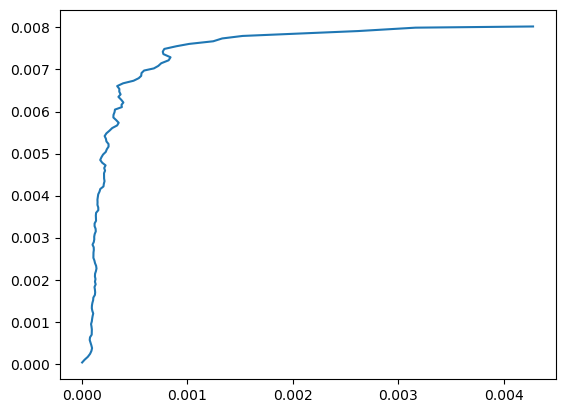

In [221]:
q = 15

plt.plot(np.var(int_scat_num,axis = 0)[:,q], var_est.T[:,q])

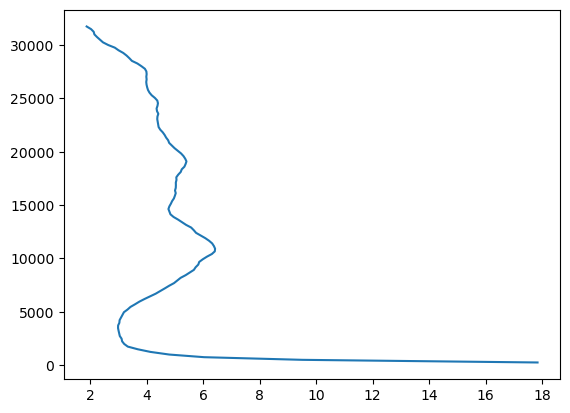

In [212]:
plt.plot((var_est.T[:,q])/(np.var(int_scat_num,axis = 0)[:,q]), N*2)

In [20]:
#np.save('1000_run_rw_35qpoints.npy', int_scat)

import ipywidgets as widgets

In [139]:
chosen_q_point = 15

def plotting_widg(chosen_q_point):
    fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize = (18,5))
    ax1.set_title('Uncertainty propogation vs timestep')
    ax1.plot(int_scat_num[:,:,chosen_q_point].T, 'b', alpha = 0.2)
    ax2.set_title('Standard deviation as a function of timestep')
    ax2.plot(dt,np.std(int_scat_num[:,:,chosen_q_point], axis = 0))
    cov = np.cov(int_scat_num[:,:,chosen_q_point].T)
    ax3.contourf(*np.meshgrid(dt, dt), cov, levels=20)
    fig.colorbar(ax3.contourf(*np.meshgrid(dt, dt), cov, levels=20))
    ax3.set_title('Covariance matrix as a function of timestep')
    fig.suptitle(f'Q-point: {q_points[chosen_q_point]}')

widgets.interact(plotting_widg, chosen_q_point = widgets.IntSlider(min=0, max=34, step=1, value=15))

interactive(children=(IntSlider(value=15, description='chosen_q_point', max=34), Output()), _dom_classes=('wid…

<function __main__.plotting_widg(chosen_q_point)>

In [22]:
int_scat.shape

(100, 128, 35)

/opt/anaconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/anaconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(0.0, 1000.0)

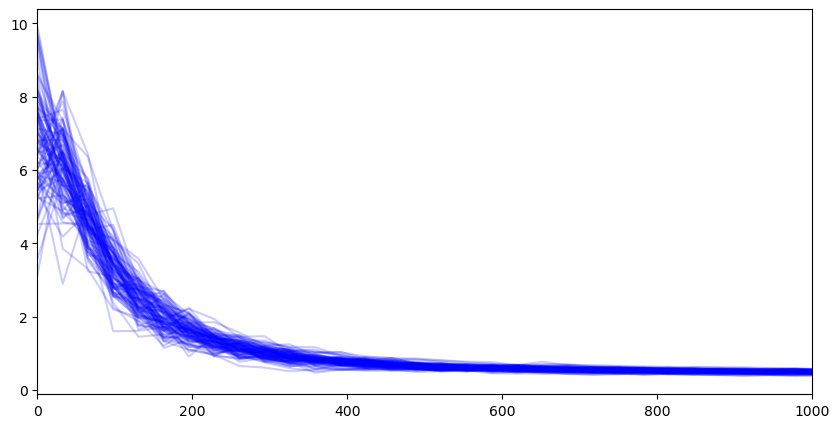

In [23]:
omega = np.linspace(0.0, 2 * np.pi / 1, len(int_scat[1]))


fig, ax = plt.subplots(1,1, figsize = (10,5))

s_q = np.fft.fft(int_scat,axis = 1)

ax.plot(omega*658.2119, s_q[:,:,4].T, 'b', alpha = 0.2)
ax.set_xlim(0, 1000)

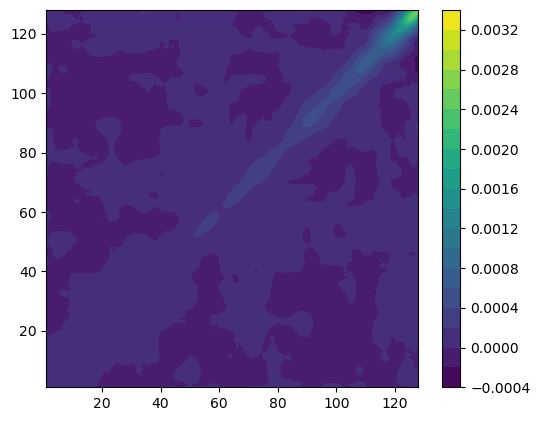

In [29]:
cov = np.cov(int_scat[:,:,10].T)


plt.subplots(figsize=(6, 4.9))
plt.contourf(*np.meshgrid(dt, dt), cov, levels=20)
plt.colorbar()
plt.show()

Text(0.5, 1.0, 'Mean STD as a function of q_point')

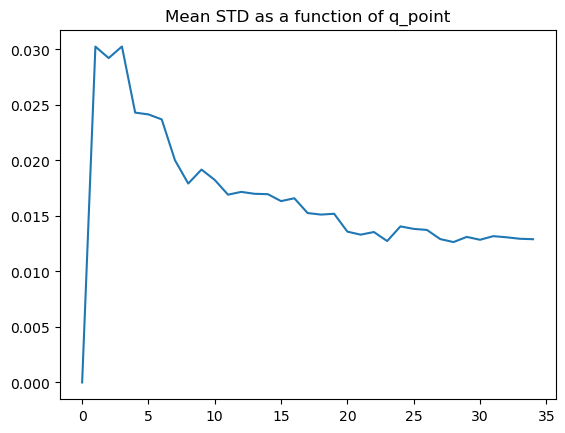

In [25]:
plt.plot(range(0,35),np.mean(np.std(int_scat[:,:,:], axis = 0), axis = 0))
plt.title('Mean STD as a function of q_point')

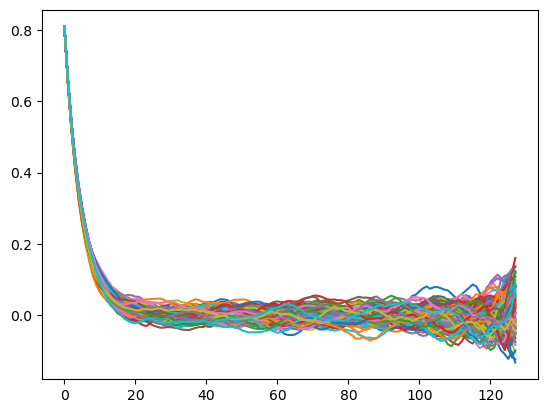

In [31]:
plt.plot(int_scat[:,:,7].T)
plt.show()

In [ ]:
n_atoms = 124
dt = np.arange(1, 129, 1)

In [28]:
def anticorrelated_walk(atoms: int,
                        timesteps: np.ndarray,
                        jump_size: int = 1,
                        seed: Union[np.random.mtrand.RandomState, None] = None) -> np.ndarray:
    """
    Perform anti correlated random walk.

    :param atoms: number of atoms
    :param timesteps: the timestep values
    :param jump_size: size of jump
    :param seed: random seed source
    :return: cumulative sum of steps for walk
    """
    possible_moves = np.zeros((6, 3))
    j = 0
    for i in range(0, 6, 2):
        possible_moves[i, j] = jump_size
        possible_moves[i + 1, j] = -jump_size
        j += 1
    possible_moves_store = np.copy(possible_moves)
    choices = seed.choice(len(range(len(possible_moves))), size=(atoms, len(timesteps)))
    steps = np.zeros((atoms, len(timesteps), 3))
    for i in range(steps.shape[0]):
        for j in range(steps.shape[1]):
            steps[i, j] = possible_moves[choices,]
            possible_moves = np.append(possible_moves_store, steps[i, j])
            possible_moves = np.append(possible_moves, steps[i, j])
            possible_moves = np.append(possible_moves, steps[i, j]).reshape(9, 3)
            choices = seed.choice(len(range(len(possible_moves))))
    cum_steps = np.cumsum(steps, axis=1)
    return cum_steps

In [ ]:
plt.plot(int_scat.var(0))

In [ ]:
plt.imshow(np.cov(int_scat.T))

In [12]:
int_scat = []

for x in range(len(disp_3d)):
    int_scat.append(np.mean(np.mean(np.exp(1j * np.linalg.norm(disp_3d[x], axis = 2)), axis = 1)))


In [ ]:
plt.scatter(dt,np.fft.fft(int_scat))

In [21]:
from scipy.stats import chi2

In [22]:
f = chi2.fit(msd, floc=0)

In [ ]:
import matplotlib.pyplot as plt

plt.hist(msd, bins=100, density=True)
x = np.linspace(np.min(msd), np.max(msd), 1000)
plt.plot(x, chi2(*f).pdf(x), 'k-')

In [ ]:
f